# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. Interesting questions to consider include:
- Where and when do major power outages tend to occur?
- What are the characteristics of major power outages with higher severity? Variables to consider include location, time, climate, land-use characteristics, electricity consumption patterns, economic characteristics, etc. What risk factors may an energy company want to look into when predicting the location and severity of its next major power outage?
- What characteristics are associated with each category of cause?
- How have characteristics of major power outages changed over time? Is there a clear trend?

### Getting the Data
The data is downloadable [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks).

A data dictionary is available at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

### Cleaning and EDA
- Note that the data is given as an Excel file rather than a CSV. Open the data in Excel or another spreadsheet application and determine which rows and columns of the Excel spreadsheet should be ignored when loading the data in pandas.
- Clean the data.
    - The power outage start date and time is given by `OUTAGE.START.DATE` and `OUTAGE.START.TIME`. It would be preferable if these two columns were combined into one datetime column. Combine `OUTAGE.START.DATE` and `OUTAGE.START.TIME` into a new datetime column called `OUTAGE.START`. Similarly, combine `OUTAGE.RESTORATION.DATE` and `OUTAGE.RESTORATION.TIME` into a new datetime column called `OUTAGE.RESTORATION`.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: pandas can load multiple filetypes: `pd.read_csv`, `pd.read_excel`, `pd.read_html`, `pd.read_json`, etc.*

*Hint 2: `pd.to_datetime` and `pd.to_timedelta` will be useful here.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
- Assess the missingness of a column that is not missing by  design.

### Hypothesis Test
Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
In this Jupyter notebook, we focus our analysis on the dataset from [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks). This dataset serves as a rich repository of various information related to the major outage patterns, and characteristics of the states in the continental U.S., including their climate and topographical characteristics, electricity consumption patterns, population, and land-cover characteristics. This data offers great implication of the frequency of occurrence during time and in certain locations. Also, we could also extract the information from the dataset such as whether the occurrence of outages is evenly distributed among months. Trying to dig into these problems, we focus on three big parts on this dataset: Cleaning and EDA, Assessment of Missingness, and conducting a Hypothesis Test.

### Cleaning and EDA
* In this part of the project, we firstly first read the excel file, drop useless rows and columns, and name the columns and index since there exists many useless rows and columns in the raw data. We have cleaned them to make the new dataframe clear and readable, and most importantly, convenient for our next-step analysis.
* Our next step is to combine some of the columns to make our dataframe to be simpler and cleaner. We choose the column pairs which have 'date' and 'time'. We combined the date and time from two columns into one column, making the dataframe simpler and the column more readable for the readers.
* After cleaning the data and making the dataframe more readable, we begin to conduct EDA. We focus on the question: 'Where and when do major power outages tend to occur?'. We conducted univariate and bivariate analysis to explore the information about the location and time that this dataframe is trying to tell us. In our analysis, we used bar plot and choropleth map to visualize our result.

### Assessment of Missingness
* In this part of the project, we firstly analyze the missingness of column `HURRICAN.NAME`. We are particularly interested in how the geographical region related to the missingness of HURRICAN.NAME. Therefore, we try to analyze that if the missingness in column `HURRICAN.NAME` is dependent of the column `U.S._STATE`.
* We first compute the observed distribution of US state under null hurrican value and non-null hurrican value. Then, we use tvd to compute the observed statistics. Then, we do permutaion on column `HURRICAN.NAME` and use tvd to compute test statistics in each permutation.
* Finally, we compute the p-value, compare it with significance level of 0.01, and conclude that the missingness of hurrican column is dependent on column `U.S._STATE`. So, the missingness in column `HURRICAN.NAME` is MAR.
***
* We next analyze the missingness of the column `DEMAND.LOSS.MW`. Since it represents the amount of peak demand lost during an outage event, we assume that the missingness in this column is dependent with column `OUTAGE.DURATION`. 
* To verify it, we try to analyze the relationship between missingness in column `DEMAND.LOSS.MW` and `OUTAGE.DURATION`, to see if they are independent.
* Similarly, we use permutation test just as in our first analysis.
* The obtained p-value indicates that the missingness of column `DEMAND.LOSS.MW` is independent of column `OUTAGE.DURATION`.

### Hypothesis Test
* In this part of the project, we develop an interesting question: **whether the major power outages' occurrances are evenly distributed across the 12 months**. This question arises when we are doing univariate analysis of column `MONTH`. Although there are difference in frequency between months, the bar plot of `MONTH` is a little bit like uniformly distributed. Therefore, we wonder if the outages are really evenly distribued across months.
* Our null hypothesis is: **the major power outages' occurrances are evenly distributed across the 12 months**
* Our alternative hypothesis is: **the major power outages' occurances are not evenly distributed across the 12 months**
* We will use tvd as our test statistic, and we use 0.01 as our significance level.
* It turns out that p-value is very small and we reject the null hypothesis. So, we conclude that the major power outages do not occur evenly across the 12 months.


# Code

To do the data analysis, we need to install the folium package

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import folium
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [2]:
from pivottablejs import pivot_ui
from IPython import display 

## Cleaning and EDA

### Data Cleaning

We first read the excel file, drop useless rows and columns, and name the columns and index

In [3]:
# Open data
df = pd.read_excel("outage.xlsx")

# df represents the raw data
df.head()

,Major power outage events in the continental U.S.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,Time period: January 2000 - July 2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Regions affected: Outages reported in this dat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND


In [4]:
# We drop useless columns and rows from the raw data
df1 = df.iloc[4:, :]

# df1 is the dataframe that drops the first four useless rows from the original raw data
df1.head()

,Major power outage events in the continental U.S.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
5,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,numeric,NaN,...,%,%,persons per square mile,persons per square mile,persons per square mile,%,%,%,%,%
6,NaN,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
7,NaN,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
8,NaN,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874


In [5]:
column_names = df1.iloc[0].values[2:]

# column_names represents the name of the columns of the data, and we should assign these names on the columns of
# the dataframe
column_names

array(['YEAR', 'MONTH', 'U.S._STATE', 'POSTAL.CODE', 'NERC.REGION',
       'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY',
       'OUTAGE.START.DATE', 'OUTAGE.START.TIME',
       'OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME',
       'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL', 'HURRICANE.NAMES',
       'OUTAGE.DURATION', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED',
       'RES.PRICE', 'COM.PRICE', 'IND.PRICE', 'TOTAL.PRICE', 'RES.SALES',
       'COM.SALES', 'IND.SALES', 'TOTAL.SALES', 'RES.PERCEN',
       'COM.PERCEN', 'IND.PERCEN', 'RES.CUSTOMERS', 'COM.CUSTOMERS',
       'IND.CUSTOMERS', 'TOTAL.CUSTOMERS', 'RES.CUST.PCT', 'COM.CUST.PCT',
       'IND.CUST.PCT', 'PC.REALGSP.STATE', 'PC.REALGSP.USA',
       'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 'UTIL.REALGSP',
       'TOTAL.REALGSP', 'UTIL.CONTRI', 'PI.UTIL.OFUSA', 'POPULATION',
       'POPPCT_URBAN', 'POPPCT_UC', 'POPDEN_URBAN', 'POPDEN_UC',
       'POPDEN_RURAL', 'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_LAND',
       'PCT_WATER_TOT

In [6]:
# We drop the first two rows and first two columns, which are useless, from df1
df2 = df1.iloc[2:, 2:]

# Then, assign the column names we obtained above
df2.columns = column_names

# Reset the index
df2.index = range(df2.shape[0])

# After that, df2 is the required dataframe we get
df2.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,2011-07-01 00:00:00,17:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
1,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,2014-05-11 00:00:00,18:38:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
2,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,2010-10-26 00:00:00,20:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
3,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,2012-06-19 00:00:00,04:30:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
4,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,2015-07-18 00:00:00,02:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874


Then, we combine some of the columns in the dataframe to make it simpler.

Combine `OUTAGE.START.DATE` and `OUTAGE.START.TIME` into a new datetime column called `OUTAGE.START`.

Combine `OUTAGE.RESTORATION.DATE` and `OUTAGE.RESTORATION.TIME` into a new datetime column called `OUTAGE.RESTORATION`.

In [7]:
# filter out these four required columns into a new dataframe df3
df3 = df2[["OUTAGE.START.DATE", "OUTAGE.START.TIME", "OUTAGE.RESTORATION.DATE", "OUTAGE.RESTORATION.TIME"]]

# dataframe, df3, contains the columns 'OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE', 
# 'OUTAGE.RESTORATION.TIME' from the cleaned dataframe df2
df3.head()

,OUTAGE.START.DATE,OUTAGE.START.TIME,OUTAGE.RESTORATION.DATE,OUTAGE.RESTORATION.TIME
0,2011-07-01 00:00:00,17:00:00,2011-07-03 00:00:00,20:00:00
1,2014-05-11 00:00:00,18:38:00,2014-05-11 00:00:00,18:39:00
2,2010-10-26 00:00:00,20:00:00,2010-10-28 00:00:00,22:00:00
3,2012-06-19 00:00:00,04:30:00,2012-06-20 00:00:00,23:00:00
4,2015-07-18 00:00:00,02:00:00,2015-07-19 00:00:00,07:00:00


In [8]:
# Extract the start date and time separately from df3
str_date = df3["OUTAGE.START.DATE"].apply(lambda x: str(x).split(" ")[0])
str_time = df3["OUTAGE.START.TIME"].apply(lambda x: " "+str(x))

# Combine the date and time
combine_str = str_date + str_time
out_start = combine_str.apply(lambda x: np.nan if x == "nan nan" else pd.to_datetime(x))

# out_start represents the combined start date and time
out_start.head()

0   2011-07-01 17:00:00
1   2014-05-11 18:38:00
2   2010-10-26 20:00:00
3   2012-06-19 04:30:00
4   2015-07-18 02:00:00
dtype: datetime64[ns]

In [9]:
# Extract the restoration date and time separately from df3
re_str_date = df3["OUTAGE.RESTORATION.DATE"].apply(lambda x: str(x).split(" ")[0])
re_str_time = df3["OUTAGE.RESTORATION.TIME"].apply(lambda x: " "+str(x))

# Combine the date and time
re_combine_str = re_str_date + re_str_time
out_restore = re_combine_str.apply(lambda x: np.nan if x == "nan nan" else pd.to_datetime(x))

# out_start represents the combined restored date and time
out_restore.head()

0   2011-07-03 20:00:00
1   2014-05-11 18:39:00
2   2010-10-28 22:00:00
3   2012-06-20 23:00:00
4   2015-07-19 07:00:00
dtype: datetime64[ns]

In [10]:
# Add the newly calculated columns and drop the old ones of df2

# Add the combined start date and time
df2["OUTAGE.START"] = out_start

# Add the combined restored date and time
df2["OUTAGE.RESTORATION"] = out_restore

# Drop the old four columns in df2
df4 = df2.drop(columns = ["OUTAGE.START.DATE", "OUTAGE.START.TIME", "OUTAGE.RESTORATION.DATE", "OUTAGE.RESTORATION.TIME"])

# df4 represents the new dataframe with the date and time columns combined
df4.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,...,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START,OUTAGE.RESTORATION
0,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,NaN,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2011-07-01 17:00:00,2011-07-03 20:00:00
1,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,intentional attack,vandalism,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2014-05-11 18:38:00,2014-05-11 18:39:00
2,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,heavy wind,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2010-10-26 20:00:00,2010-10-28 22:00:00
3,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,thunderstorm,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2012-06-19 04:30:00,2012-06-20 23:00:00
4,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,severe weather,NaN,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2015-07-18 02:00:00,2015-07-19 07:00:00


### EDA

In the Exploratory Data Analysis, we are going to answer the question:
Where and when do major power outages tend to occur?

In [11]:
# Show the dataframe again for convenience:
df4.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,...,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START,OUTAGE.RESTORATION
0,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,NaN,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2011-07-01 17:00:00,2011-07-03 20:00:00
1,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,intentional attack,vandalism,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2014-05-11 18:38:00,2014-05-11 18:39:00
2,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,heavy wind,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2010-10-26 20:00:00,2010-10-28 22:00:00
3,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,thunderstorm,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2012-06-19 04:30:00,2012-06-20 23:00:00
4,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,severe weather,NaN,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2015-07-18 02:00:00,2015-07-19 07:00:00


#### Univariate Analysis: 
* Firstly, we wonder **when** do major power outages tend to occur?

To answer this question, we look at the dataframe and find columns related to time. We found two relevant columns:
`YEAR` and `MONTH`. We will draw the bar plot representing the occurring frequency of each column and to see the highest frequency.

<AxesSubplot:>

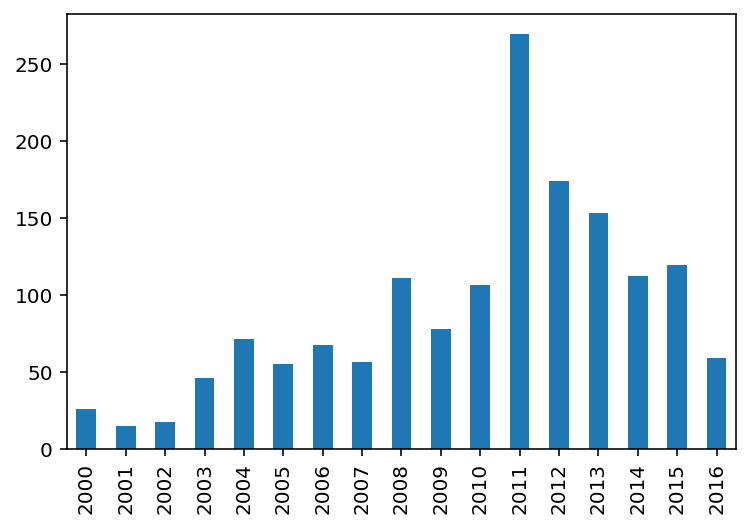

In [141]:
# 'YEAR' column:

# We select the required column and count the number of times of outages occurred in each year, 
# denoted by year_freq
year_freq = df4["YEAR"].value_counts().sort_index()

# Then, we use a bar plot to display the frequency of outages occurred in each year. The bar plot is shown below
year_freq.plot(kind = "bar")

* Conclusion:
From the graph above, it seems that major outages reached a peak of more than 250 per year in 2011, and they occur more frequently in recent years than previous years. 

<AxesSubplot:>

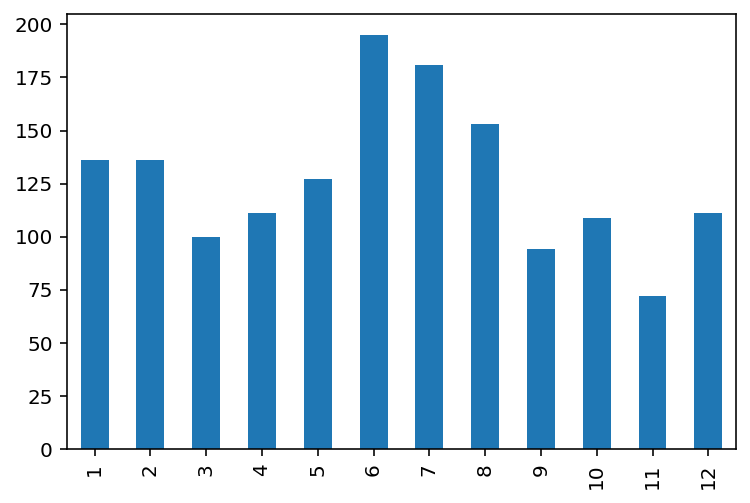

In [142]:
# 'MONTH' column:

# We select the required column and count the number of times of outages occurred in each month, 
# denoted by month_freq
month_freq = df4["MONTH"].value_counts().sort_index()

# Then, we use a bar plot to display the frequency of outages occurred in each month. The bar plot is shown below
month_freq.plot(kind = "bar")

* Conclusion:
From the graph above, it seems that major outages tend to occur the most in June, and mostly in summer (in June, July and August).

* Next, we wonder **where** do major power outages tend to occur?

To answer this question, we look at the dataframe and find columns related to geographical places. We found two relevant columns: `U.S._STATE`, `POSTAL.CODE`, and `NERC.REGION`. Since these three columns represent the same meaning of a region, we can pick one of them. We pick `U.S._STATE` and count the occurring frequency of each state and to see the highest frequency.

In [143]:
# We select the required column and count the number of times of outages occurred in each state, 
df4["U.S._STATE"].value_counts().head()

California    210
Texas         127
Washington     97
Michigan       95
New York       71
Name: U.S._STATE, dtype: int64

* Conclusion: from the result, we can see that major power outages tends to occur most frequently in California (210 in total), and then Texas (127 in total).

#### Bivariate Analysis and Interesting Aggregates

Now, let's look at a pivot table that summarize major outages occurence with location and month

In [23]:
pivot = df4.pivot_table(index = "MONTH", columns = "U.S._STATE", aggfunc = "count", fill_value = 0)

# pivot represents the pivot table that summarize major outages occurence with location and month
pivot

ANOMALY.LEVEL                                                   \
U.S._STATE       Alabama Arizona Arkansas California Colorado Connecticut   
MONTH                                                                       
1                      0       3        2         11        0           2   
2                      0       5        2         24        3           0   
3                      0       1        1         17        1           2   
4                      1       2        3         14        1           1   
5                      0       2        1         17        1           3   
6                      1       4        4         20        3           1   
7                      1       5        3         28        2           3   
8                      1       1        3         12        0           1   
9                      0       0        2         10        0           2   
10                     0       1        2         21        4           1   
11                     0       0        1         12        0           2   
12                     1       4        1         24        0           0   

                                                          ...         YEAR  \
U.S._STATE Delaware District of Columbia Florida Georgia  ... South Dakota   
MONTH                                                     ...                
1                 6                    2       3       2  ...            0   
2                 2                    2       5       4  ...            0   
3                 3                    0       3       0  ...            0   
4                 7                    0       2       1  ...            0   
5                 3                    0       3       2  ...            0   
6                 5                    2       2       3  ...            0   
7                 3                    0       1       0  ...            0   
8                 2                    3      12       0  ...            2   
9                 3                    1      10       2  ...            0   
10                2                    0       3       0  ...            0   
11                4                    0       0       2  ...            0   
12                0                    0       1       1  ...            0   

                                                                           \
U.S._STATE Tennessee Texas Utah Vermont Virginia Washington West Virginia   
MONTH                                                                       
1                  7     7    3       0        2         10             0   
2                  2    12    4       1        3          8             0   
3                  2    11    3       1        3          8             1   
4                  8    18    6       1        0          9             0   
5                  1    11    6       1        2          5             0   
6                  9    17    1       2        6          7             2   
7                  4    12    5       1        9         10             0   
8                  1    14    2       0        4         10             0   
9                  0    11    1       0        2          6             0   
10                 0     4    3       1        1          3             1   
11                 0     3    4       1        1          7             0   
12                 0     6    3       0        3         14             0   

                              
U.S._STATE Wisconsin Wyoming  
MONTH                         
1                  7       0  
2                  0       0  
3                  1       0  
4                  2       0  
5                  0       1  
6                  2       1  
7                  1       0  
8                  4       1  
9                  1       0  
10                 1       1  
11                 1       2  
12                 0       0  

[12 rows x 2499 columns]

The table is a little bit large, we will use pivot_ui to draw a heat map in order to visualize the pivot table. Since we need to explore the columns `U.S._STATE` and `MONTH`, we use pivot_ui(df4), and select these two certain columns to visualize their relationship.

In [ ]:
pivot_ui(df4)

The output is difficult to display since we need to manually select the two columns, so we use a picture instead. This picture is from the output of the above code.

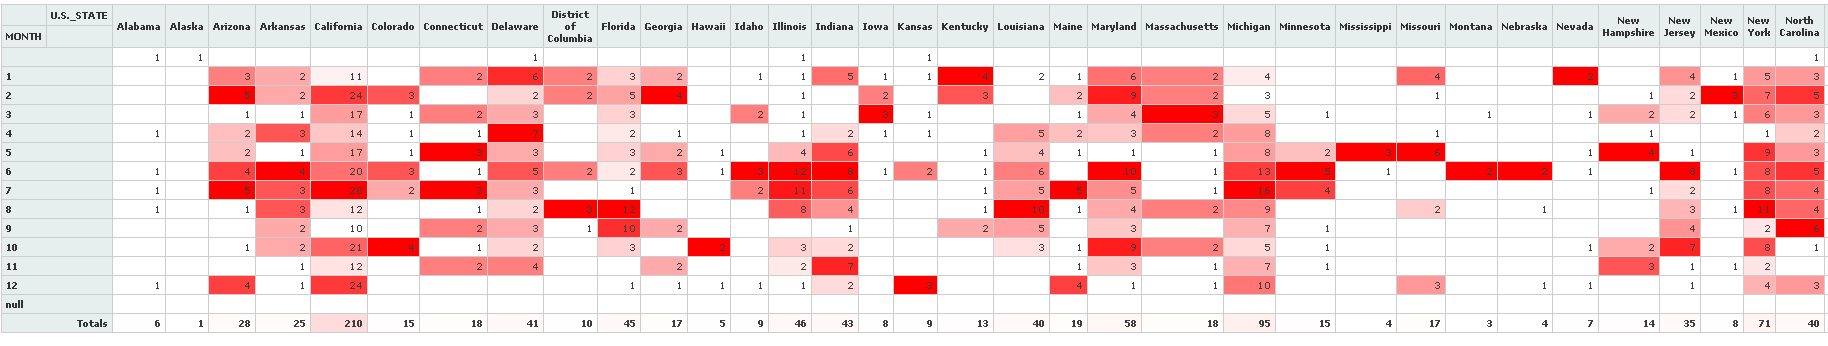

In [62]:
display.Image("pvtable.png")

Now let's visualize the major power outages by states on a choropleth map

In [14]:
# We use a dictionary of abbreviations in order to draw the choropleth map
state_dict = us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [15]:
df_for_fol = df4["U.S._STATE"].value_counts(normalize = True).to_frame().reset_index()
df_for_fol["index"] = df_for_fol["index"].replace(state_dict)

# df_for_fol represents the percentage of major outages in each state
df_for_fol.head(2)

,index,U.S._STATE
0,CA,0.136897
1,TX,0.082790


In [16]:
url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
state_geo = f"{url}/us-states.json"
m = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_for_fol,
    columns=["index", "U.S._STATE"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Percentage of major power outages (%)",
).add_to(m)
folium.LayerControl().add_to(m)

# m represents the final choropleth map that represents the percentage of major outages in each state on the 
# geographical graph
m

## Assessment of Missingness

Let's first check which columns have missing data

In [144]:
# This represents the percentage of null values occurred in each column
pd.isnull(df4).mean()

YEAR                     0.000000
MONTH                    0.005867
U.S._STATE               0.000000
POSTAL.CODE              0.000000
NERC.REGION              0.000000
CLIMATE.REGION           0.003911
ANOMALY.LEVEL            0.005867
CLIMATE.CATEGORY         0.005867
CAUSE.CATEGORY           0.000000
CAUSE.CATEGORY.DETAIL    0.307040
HURRICANE.NAMES          0.953064
OUTAGE.DURATION          0.037810
DEMAND.LOSS.MW           0.459583
CUSTOMERS.AFFECTED       0.288787
RES.PRICE                0.014342
COM.PRICE                0.014342
IND.PRICE                0.014342
TOTAL.PRICE              0.014342
RES.SALES                0.014342
COM.SALES                0.014342
IND.SALES                0.014342
TOTAL.SALES              0.014342
RES.PERCEN               0.014342
COM.PERCEN               0.014342
IND.PERCEN               0.014342
RES.CUSTOMERS            0.000000
COM.CUSTOMERS            0.000000
IND.CUSTOMERS            0.000000
TOTAL.CUSTOMERS          0.000000
RES.CUST.PCT  

We have found that `HURRICANE.NAMES` has about 95% missing data. Let's try to figure out what kind of missing this is.
We guess that the `HURRICANE.NAMES` missingness may be affected by the state region. We will use tvd as a test statistic, and a significance level of 0.01.

In [145]:
# We first find the states that have null value in 'HURRICANE.NAMES'
null_dist = df4[pd.isnull(df4.get("HURRICANE.NAMES"))]["U.S._STATE"].value_counts(normalize = True).sort_index()
df_null = null_dist.to_frame()
# Then the states that have non-null value in 'HURRICANE.NAMES'
non_null_dist = df4[~pd.isnull(df4.get("HURRICANE.NAMES"))]["U.S._STATE"].value_counts(normalize = True).sort_index()
df_non_null = non_null_dist.to_frame()

# Merge the two categories together
df5 = pd.merge(df_null, df_non_null, how = "left", left_index = True, right_index = True)
df5.columns = ["null_dist", "non_null_dist"]
df6 = df5.fillna(0)

# df6 represents the percentage that a state's null and non-null value occurred in the dataframe
df6.head()

,null_dist,non_null_dist
Alabama,0.004104,0.0
Alaska,0.000684,0.0
Arizona,0.019152,0.0
Arkansas,0.017100,0.0
California,0.143639,0.0


In [146]:
# Calculate the observed TVD
observe_stat = (df6["null_dist"] - df6["non_null_dist"]).abs().sum()/2
observe_stat

0.6269189846481227

In [147]:
# Now we conduct the permutation test with N=1000
N = 1000
result = []
for _ in range(N):
    # Permutate the column "HURRICANE.NAMES"
    df7 = df4.assign(permu = np.random.permutation(df4["HURRICANE.NAMES"]))
    
    # Calculate the new test statistic
    null_dist = df7[pd.isnull(df7.get("permu"))]["U.S._STATE"].value_counts(normalize = True).sort_index()
    non_null_dist = df7[~pd.isnull(df7.get("permu"))]["U.S._STATE"].value_counts(normalize = True).sort_index()
    df_null = null_dist.to_frame()
    df_non_null = non_null_dist.to_frame()
    df5 = pd.merge(df_null, df_non_null, how = "left", left_index = True, right_index = True)
    df5.columns = ["null_dist", "non_null_dist"]
    df6 = df5.fillna(0)
    test_stat = (df6["null_dist"] - df6["non_null_dist"]).abs().sum()/2
    
    # Append the new test statistic to the result list
    result.append(test_stat)

# the result list represents the permutated TVDs
result[:5]

[0.22811217510259918,
 0.2922936616507067,
 0.28640370877032983,
 0.3094125246998024,
 0.27257181942544456]

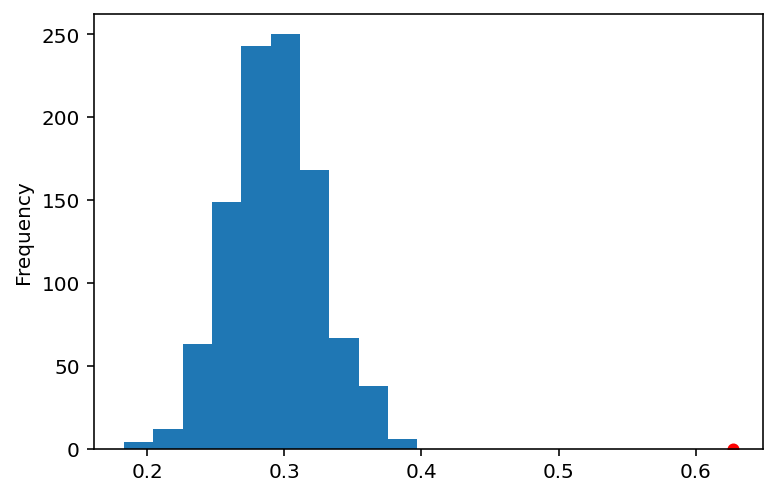

In [148]:
# Visualize the distribution of the permutated result and observed test statistic
pd.Series(result).plot(kind = "hist")
plt.scatter([observe_stat], [0],s = 25,  c = "r")

We can observe that there is no permutated result at the right of the red point. Therefore, it is likely that p-value has a very small value. To check this, we calculate the p_value

In [123]:
# Calculate the required p-value and compare it with the significance level
p_val = np.count_nonzero(result >= observe_stat)/len(result)
p_val

0.0

Since p-value is smaller than the significance level of 0.01, we can confidently conclude that HURRICANE.NAMES data with nan values and HURRICANE.NAMES data without nan values have a different distribution on `U.S._STATE`. It suggests that the `HURRICANE.NAMES` is missing at random, and it is dependent on `U.S._STATE`.

****
We also want to check the missing mechanism for column `DEMAND.LOSS.MW`, we want to see whether it is missing at random dependent on the outage duration. We might guess that if the outage duration is very short, the demand loss will be so small that it was not documented. So, we want to explore it. We will use the sample mean as a test statistic, and a significance level of 0.01.

In [17]:
# We first compute observe stat
null_mean = df4[pd.isnull(df4["DEMAND.LOSS.MW"])]["OUTAGE.DURATION"].mean()
non_null_mean = df4[~pd.isnull(df4["DEMAND.LOSS.MW"])]["OUTAGE.DURATION"].mean()
obstat = abs(null_mean - non_null_mean)
obstat

128.76779051172707

In [18]:
# Now we run the permutation test
result = []

for _ in range(1000):
    df10 = df4.assign(permu = np.random.permutation(df4["DEMAND.LOSS.MW"]))
    null_mean = df10[pd.isnull(df10["permu"])]["OUTAGE.DURATION"].mean()
    non_null_mean = df10[~pd.isnull(df10["permu"])]["OUTAGE.DURATION"].mean()
    teststat = abs(null_mean - non_null_mean)
    result.append(teststat)
    
# result list is a list of permutated statistics
result[:5]

[331.50581708857453,
 13.97979379689923,
 108.9777379053694,
 93.56050106609791,
 343.19265532544387]

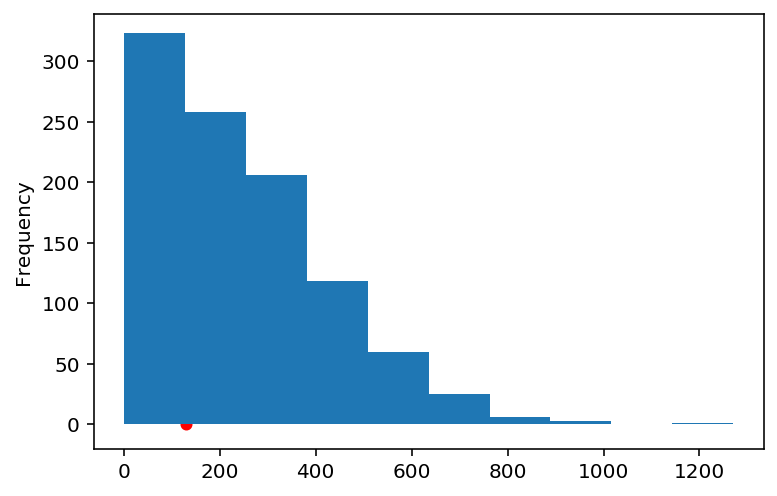

In [19]:
# Visualize the distribution of the permutated result and observed test statistic
pd.Series(result).plot(kind = "hist")
plt.scatter([obstat], [0.01],s = 25,  c = "r");

We find that the area to the right of the distribution is very large. So, we are likely to have a large p-value.

In [155]:
# Calculate the required p-value and compare it with the significance level
p_val = np.count_nonzero(result >= obstat)/len(result)
p_val

0.684

Since, we have a large p-value which is larger than significance level of 0.01, we can't reject the null hypothesis that the missingness of `DEMAND.LOSS.MW` is independent of `OUTAGE.DURATION`.

## Hypothesis Test

We want to do a hypothesis test on the month of occurance of major power outages. In our null hypothesis, we assume that major power outages occur evenly in 12 months. Then, our alternative hypothesis is that the major power outages' occurance is not evenly distributed across 12 months. We use a significance level of 0.01.

In [116]:
df8 = df4[~pd.isnull(df4["MONTH"])]

# Here, df8 represents the dataframe that the column 'MONTH' are all not null
# The output of df8.shape represents the magnitude of rows and columns of df8
df8.shape

(1525, 53)

In [121]:
# The output of df4.shape represents the magnitude of rows and columns of df4
df4.shape

(1534, 53)

We can observe the df4 has 9 rows, which represents 9 outages, more than df8. This means that there are 9 major power of outages that have missing values in month. We take a look at these 9 outages and to determine whether we should randomly fill, conditionally fill, or just drop them.

In [122]:
# This dataframe shows the data that the 'MONTH' column is null
df4[pd.isnull(df4["MONTH"])]

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,...,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START,OUTAGE.RESTORATION
239,2000,NaN,Texas,TX,FRCC,South,NaN,NaN,equipment failure,transformer outage,...,2435.3,1539.9,15.2,3.35,0.58,97.2583,2.74204,2.09087,NaT,NaT
339,2000,NaN,Alabama,AL,SERC,Southeast,NaN,NaN,severe weather,thunderstorm,...,1278.5,988.7,40.4,4.36,0.99,96.6139,3.38611,2.01831,NaT,NaT
365,2000,NaN,Illinois,IL,SERC,Central,NaN,NaN,severe weather,wildfire,...,2877.6,1759.5,28.6,7.11,1.12,95.8646,4.13544,1.41589,NaT,NaT
766,2000,NaN,North Carolina,NC,SERC,Southeast,NaN,NaN,severe weather,thunderstorm,...,1367.2,1043.7,73.5,9.48,2.11,90.3361,9.66387,7.52894,NaT,NaT
887,2000,NaN,Delaware,DE,RFC,Northeast,NaN,NaN,system operability disruption,NaN,...,1838.3,1083,97.3,20.88,6.21,78.3045,21.6955,3.65609,NaT,NaT
1318,2000,NaN,Virginia,VA,SERC,Southeast,NaN,NaN,equipment failure,relaying malfunction,...,2265.2,1179.2,53.3,6.75,0.97,92.3203,7.67972,2.99708,NaT,NaT
1506,2002,NaN,Kansas,KS,SPP,South,NaN,NaN,severe weather,winter storm,...,2176.5,1983,9.1,1.19,0.42,99.3692,0.632004,0.632004,NaT,NaT
1530,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,fuel supply emergency,Coal,...,2192.2,1868.2,3.9,0.27,0.1,97.5996,2.40177,2.40177,NaT,NaT
1533,2000,NaN,Alaska,AK,ASCC,NaN,NaN,NaN,equipment failure,failure,...,1802.6,1276,0.4,0.05,0.02,85.7612,14.2388,2.90118,NaT,NaT


Observe that, these missing data all come from early years (mostly 2000, one 2002 and one 2006). However, it is a little bit hard to conditionally fill them in since they come from different years. Also, we cannot fill the null values with mean value since `MONTH` is a categorical data. Since there are only 9 out of 1534 data is missing, we drop them in our analysis.

However, we do believe that dropping these 9 data might cause a little bias in our result. Since as we mentioned, all of the missing data comes from early years, which may cause a bias if we just simply drop them.

In [124]:
# let's see the observed distribution
# we will use its tvd relative to the uniform distribution as out test statistic
unif = np.array([1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12])
month_freq = df4["MONTH"].value_counts(normalize = True).sort_index()

# month_freq is the frequency of outages occurred in each month
month_freq

1     0.089180
2     0.089180
3     0.065574
4     0.072787
5     0.083279
6     0.127869
7     0.118689
8     0.100328
9     0.061639
10    0.071475
11    0.047213
12    0.072787
Name: MONTH, dtype: float64

In [125]:
# Calculate the observed TVD
ob_dist = month_freq.values
ob_stat = abs((ob_dist - unif)).sum()/2
ob_stat

0.10857923497267762

In [126]:
# we first generate a distribution under null hypothesis
null_num = np.random.multinomial(1525, [1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12])
null_dist = null_num/1525

# null_dist is a result of a randomly generated frequency of outages occurred in each month under the null
null_dist

array([0.09639344, 0.08786885, 0.08786885, 0.08131148, 0.0852459 ,
       0.08327869, 0.08065574, 0.07606557, 0.06557377, 0.08721311,
       0.08131148, 0.08721311])

In [127]:
# we compute the test stat for 10000 times using the method above and calculate p-value
result = []
for _ in range(10000):
    null_num = np.random.multinomial(1525, [1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12])
    null_dist = null_num/1525
    test_stat = abs((null_dist - unif)).sum()/2
    result.append(test_stat)

# Calculate the p-value
np.count_nonzero(result >= ob_stat)/len(result)

0.0

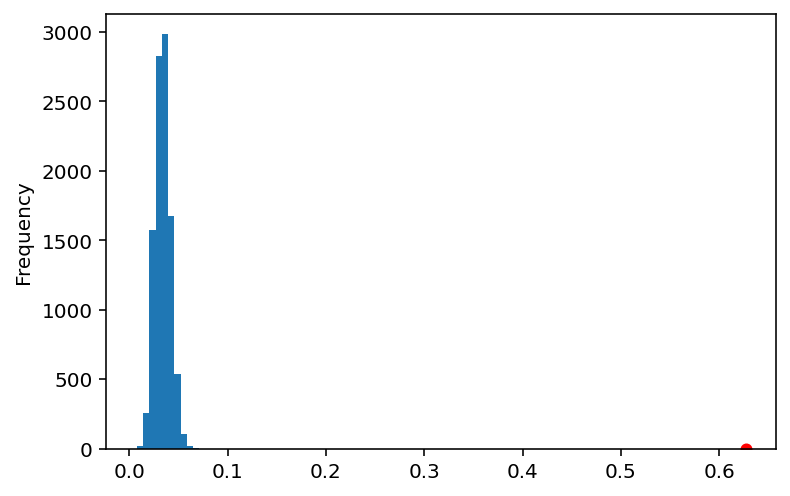

In [129]:
# Visualize the distribution of the generated result and observed test statistic
pd.Series(result).plot(kind = "hist")
plt.scatter([observe_stat], [0],s = 25,  c = "r")

**Conclusion**: Since the p-value is less than 0.01, we will reject the null hypothesis. So, we conclude that the major power outages' occurance is not evenly distributed across 12 months.